# Implement Linear Regression From Scratch (with Normal Equation)
__Author__ : Mohammad Rouintan , 400222042

__Course__ : Undergraduate Machine Learning Course

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Problem
Implement Linear Regression using the normal equation as the training algorithm from scratch.


### What is the Normal Equation ?

The normal equation is a closed-form solution used to find the value of θ that minimizes the cost function. Another way to describe the normal equation is as a one-step algorithm used to analytically find the coefficients that minimize the loss function. Both descriptions work, but what exactly do they mean? We will start with linear regression.

Linear regression makes a prediction, $\hat{y}$, by computing the weighted sum of input features plus a bias term. Mathematically it can be represented as follows:

$$
\begin{align}
\hat{y} &= \theta_{0}x_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + \dots + \theta_{n}x_{n}
\end{align}
$$

Where $\theta$ represents the parameters and n is the number of features.

Essentially, all that occurs in the above equation is the dot product of $\theta$, and $x$ is being summed. Thus, a more concise way to represent this is to use its vectorized form:

$$
\begin{align}
\hat{y} &= h(\theta) = \theta^{T}x \tag{2}
\end{align}
$$

$h(\theta)$ is the hypothesis function.

Given this approximate target function, we can use our model to make predictions. To determine if our model has learned well, it’s important we measure the performance of our model on the training data. For this purpose, we compute a loss function. The goal of the training process is to find the values of theta ($\theta$) that minimize the loss function.

Here’s how we can represent our loss function mathematically:

$$
\begin{align}
J(\theta_{0}, \theta_{1}, \theta_{2}, \dots, \theta{m}) &= \frac{1}{2m} \sum\limits_{i = 1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2 \tag{3}
\end{align}
$$

In the above equation, theta ($\theta$) is a $m + 1$ dimensional vector, and our loss function is a function of the vector value. Consequently, the partial derivative of the loss function, $J$, has to be taken with respect to every parameter of $\theta_{j}$ in turn. All of them must equal zero. Following this process and solving for all of the values of $\theta$ from $\theta_{0}$ to $\theta_{m}$ will result in the values of θ that minimize the loss function.

Working through the solution to the parameters $\theta_{0}$ to $\theta_{m}$ using the process described above results in an extremely involved derivation procedure. There is indeed a faster solution.
Take a look at the formula for the normal equation:

$$
\begin{align}
\theta &= (X^{T}X)^{-1}X^{T}y
\end{align}
$$

Where:

$\theta$ → The parameters that minimize the loss function<br> 
$X$ → The input feature values for each instance<br> 
$y$ → The vector of output values for each instance

### The Normal Equation vs Gradient Descent
While both methods seek to find the parameters theta ($\theta$) that minimize the loss function, the method of approach differs greatly between the two solutions.

Since we’ve already covered how the normal equation works in ‘What is the Normal Equation?’, in this section, we will briefly touch on gradient descent and then provide ways in which the two techniques differ.

### How do they Differ?
The most obvious way in which the normal equation differs from gradient descent is that it’s analytical. Gradient descent takes an iterative approach which means our parameters are updated gradually until convergence. Another subtle difference baked into this is that gradient descent requires us to define a learning rate that controls the size of the steps taken towards the minimum of the loss function. The normal equation doesn’t require us to define a learning rate because we are not taking iterative steps - we get the results directly.

Also, feature scaling is not required when we use the normal equation approach; we typically perform feature scaling to ensure our features have a similar range of values. This is because gradient descent is sensitive to the ranges of our data points. Failing to normalize our features when we use gradient descent may introduce skewness into the contour plot of the loss function, but the normal equation does not suffer from this problem.

In [2]:
class myLinearRegression():

    """
        Linear Regression model with normal equation
        
        Attributes
        ----------
        coef : numpy.array
                weights of our model are initialized with random numbers in [0,1]  
        intercept : float
            bias of our model which is initialized with 0


        Methods
        -------
        fit(X,y)
            training the weights with regards to dataset (X and y)
        predict(X)
                predict target values corresponding to X
        _compute_normal_equation(X,y_true)
                        computing normal equation
    """

    def __init__(self):
        self.coef = None
        self.intercept = None

    # computing normal equation
    def _compute_normal_equation(self,X,y):
        best_theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.intercept, *self.coef = best_theta

    def predict(self,X):
        return np.dot(X,self.coef) + self.intercept

    def fit(self,X,y):
        self._compute_normal_equation(X, y)

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


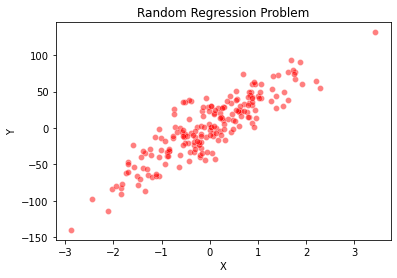

In [46]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=200, n_features=1, n_informative=1, noise=20, random_state=40)
sns.scatterplot(X.squeeze(), y, color='red', alpha=0.5)
plt.title('Random Regression Problem')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# add x0 to each sample
X_train = np.concatenate([np.ones((len(X), 1)), X], axis=1)

In [49]:
linear_regression = myLinearRegression()
linear_regression.fit(X_train,y)

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


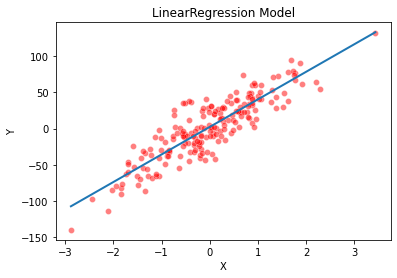

In [50]:
x_range = np.linspace(X.min(), X.max(), num=400)
predicted_y1 = linear_regression.predict(x_range.reshape(-1, 1))

sns.scatterplot(X.squeeze(), y, color='red', alpha=0.5)
plt.plot(x_range, predicted_y1, linewidth=2)
plt.title('LinearRegression Model')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [6]:
print(f'Coefficients is {linear_regression.coef}')
print(f'Intercept is {linear_regression.intercept}')

Coefficients is [38.075303414681905]
Intercept is 2.18796097324161


### Linear Regression Using Scikit-Learn

In [7]:
from sklearn.linear_model import LinearRegression

Linear_Regression = LinearRegression()
Linear_Regression.fit(X, y)

LinearRegression()

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


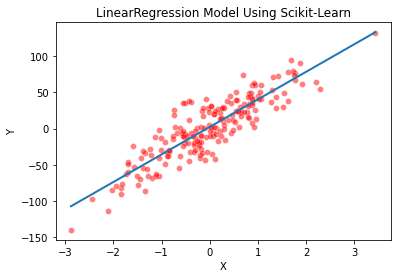

In [8]:
x_range = np.linspace(X.min(), X.max(), num=400)
predicted_y2 = Linear_Regression.predict(x_range.reshape(-1, 1))

sns.scatterplot(X.squeeze(), y, color='red', alpha=0.5)
plt.plot(x_range, predicted_y2, linewidth=2)
plt.title('LinearRegression Model Using Scikit-Learn')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [9]:
print(f'Coefficients is {Linear_Regression.coef_}')
print(f'Intercept is {Linear_Regression.intercept_}')

Coefficients is [38.07530341]
Intercept is 2.1879609732416103


Show Two Model in the same plot

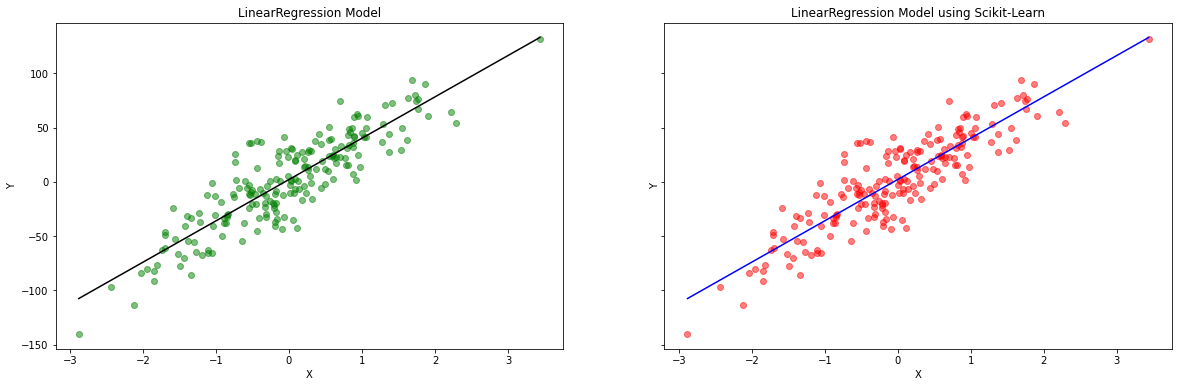

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6), sharex=True, sharey=True)

ax[0].scatter(X.squeeze(), y, color='green', alpha=0.5)
ax[0].plot(x_range, predicted_y1, c='black')
ax[0].set_title("LinearRegression Model")
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')

ax[1].scatter(X.squeeze(), y, color='red', alpha=0.5)
ax[1].plot(x_range, predicted_y2, c='blue')
ax[1].set_title("LinearRegression Model using Scikit-Learn")
ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')
plt.show()

We can also compute the mean absolute error & mean squared error:

In [11]:
import sklearn.metrics as metrics

def regression_results(y_test, y_pred):
    mae = metrics.mean_absolute_error(y_test, y_pred) 
    mse = metrics.mean_squared_error(y_test, y_pred) 
    r2 = metrics.r2_score(y_test, y_pred)

    print('R-Square: ', round(r2, 10))
    print('MAE: ', round(mae, 10))
    print('MSE: ', round(mse, 10))
    print('RMSE: ', round(np.sqrt(mse), 10))

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_predicted1 = linear_regression.predict(X)
y_predicted2 = Linear_Regression.predict(X)
regression_results(y, y_predicted1)
print()
regression_results(y, y_predicted1)

R-Square:  0.7774627975
MAE:  16.0493914382
MSE:  406.9654011356
RMSE:  20.1733834826

R-Square:  0.7774627975
MAE:  16.0493914382
MSE:  406.9654011356
RMSE:  20.1733834826


### Run Linear Regression On Diabetes Dataset

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes

linear_regression = make_pipeline(StandardScaler(), myLinearRegression())
Linear_Regression = make_pipeline(StandardScaler(), LinearRegression())
diabetes = load_diabetes()

In [14]:
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [15]:
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [16]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [17]:
df = pd.DataFrame(diabetes['data'], columns=diabetes['feature_names'])
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [18]:
df.isnull().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

In [19]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [51]:
X, y = df, diabetes['target']

In [52]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train_normal = np.concatenate([np.ones((len(x_train), 1)), x_train], axis=1)

In [53]:
linear_regression.fit(x_train_normal, y_train)
Linear_Regression.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [54]:
y_predicted1 = linear_regression.predict(x_test)
y_predicted2 = Linear_Regression.predict(x_test)

print('LinearRegression with Normal Equation: ')
regression_results(y_test, y_predicted1)
print()
print('LinearRegression of Scikit-Learn: ')
regression_results(y_test, y_predicted2)

LinearRegression with Normal Equation: 
R-Square:  0.4526066022
MAE:  42.793893042
MSE:  2900.1732878832
RMSE:  53.8532569849

LinearRegression of Scikit-Learn: 
R-Square:  0.4526066022
MAE:  42.793893042
MSE:  2900.1732878832
RMSE:  53.8532569849


## Conclusion for this problem
Thus, it’s best to use gradient descent when the number of features in the dataset is large. Andrew Ng, a prominent machine learning and AI expert, recommends you should consider using gradient descent when the number of features, n, is greater than 10,000. For 10,000 features or less, you may be better off using the normal equation since you’re not required to select a value for the learning rate which means you have one less hyperparameter to tune.